In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

stock_symbol = "IBM"
start_date = "2010-01-01"
end_date = "2023-10-31"
    
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
                         
csv_data = pd.read_csv('Data.csv')
    
csv_data['Date'] = pd.to_datetime(csv_data['Date'])
stock_data.index = pd.to_datetime(stock_data.index)


csv_data['Date'] = pd.to_datetime(csv_data['Date'])
stock_data.index = pd.to_datetime(stock_data.index)
    
    # Merge stock data with CSV data on the 'Date' column
merged_data = pd.merge(csv_data, stock_data['Close'], how='inner',
                           left_on='Date', right_index=True)
    
    
"""Finding out volatility using Standard Deviation"""
    
    # Extract features and target
features = merged_data[['Unemployment Rate', 'Interest Rate']]
target = merged_data['Close']
    
    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                        target, test_size=0.2, random_state=0)
    
    # Create a linear regression model
model = LinearRegression()
    
model.fit(X_train, y_train)
    
predictions = model.predict(X_test)
    
    # Calculate predicted volatility
predicted_volatility = round(np.std(predictions),2)
    
print("Predicted Volatility (using Standard Deviation):", 
          predicted_volatility)
    
    
"""Finding out volatility using GARCH Model"""
    
    # GARCH model
garch_model = arch_model(target, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')
    
    # Forecast volatility
garch_forecast = garch_result.forecast()
    
    # Extract the forecasted volatility
forecasted_volatility = round(np.sqrt(garch_forecast.variance.iloc[-1, :])
                                  ,2)
print("Predicted Volatility (using GARCH model):",
          forecasted_volatility.values[0])


[*********************100%%**********************]  1 of 1 completed
Predicted Volatility (using Standard Deviation): 9.47
Predicted Volatility (using GARCH model): 8.33


Text(0, 0.5, 'Year')

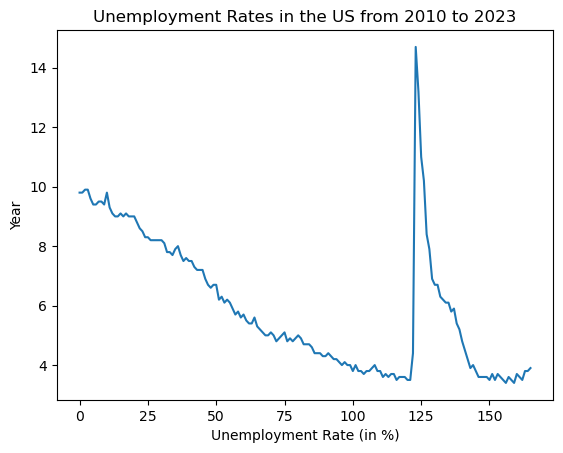

Text(0, 0.5, 'Year')

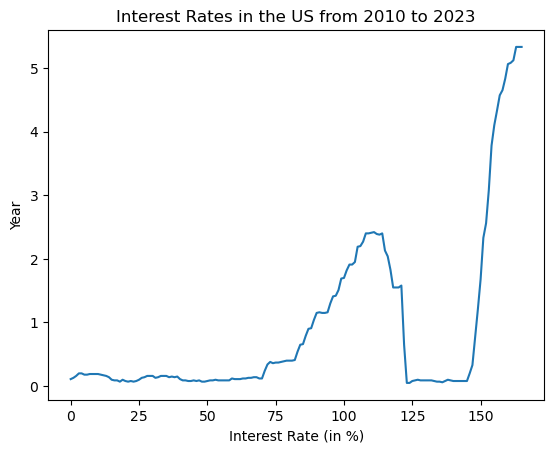

In [25]:
interest_data = csv_data["Interest Rate"]
plt.plot(interest_data)
plt.title("Interest Rates in the US from 2010 to 2023")
plt.xlabel("Interest Rate (in %)")
plt.ylabel("Year")

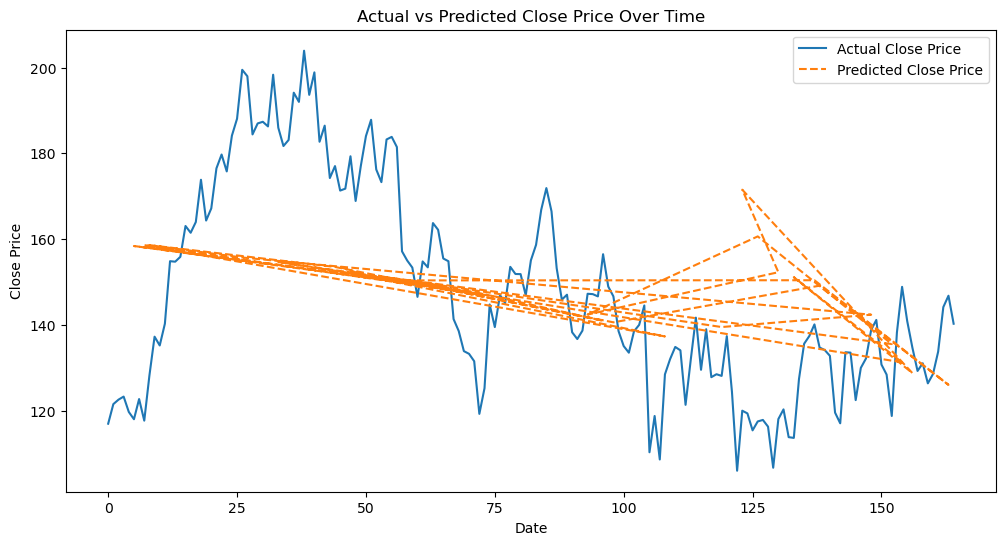

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Actual Close Price')
plt.plot(X_test.index, predictions, label='Predicted Close Price', linestyle='dashed')
plt.title('Actual vs Predicted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

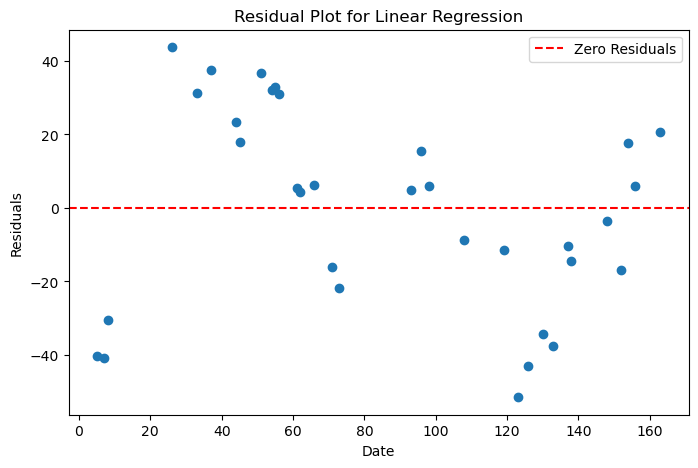

In [27]:
plt.figure(figsize=(8, 5))
residuals = y_test - predictions
plt.scatter(X_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

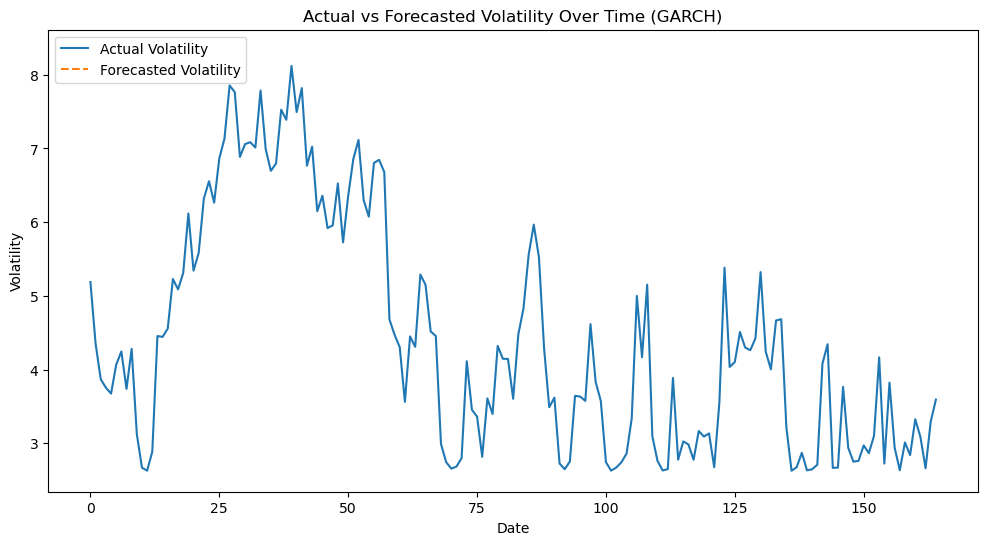

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, np.sqrt(garch_result.conditional_volatility), label='Actual Volatility')
plt.plot(garch_forecast.variance.index, np.sqrt(garch_forecast.variance.iloc[-1, :]), label='Forecasted Volatility', linestyle='dashed')
plt.title('Actual vs Forecasted Volatility Over Time (GARCH)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()